<a href="https://colab.research.google.com/github/danacioDS/Edureka-Practices/blob/master/01_KNN_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN Algorithm**

In [ ]:
import pandas as pd
import numpy as np

import scipy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

import seaborn as sns
from pylab import rcParams 
import urllib

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Import data from Drive **

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
!pip install PyDrive

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1nwvZCkptUxqVLkP4_sGFTD-fO_JHoarI"})   # replace the id with id of file you want to access
downloaded.GetContentFile('matcars.csv')

In [ ]:
import pandas as pd
cars = pd.read_csv('matcars.csv')
cars.columns = ['cars_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'sec', 'an', 'gear', 'carb']

In [ ]:
cars.head(100)

,cars_names,mpg,cyl,disp,hp,drat,wt,qsec,sec,an,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
cars['mpg'].head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

**Exploratory Data Analysis**

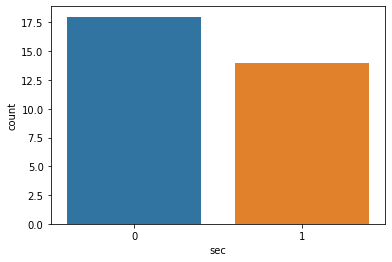

In [ ]:
sns.countplot(x='sec', data=cars)

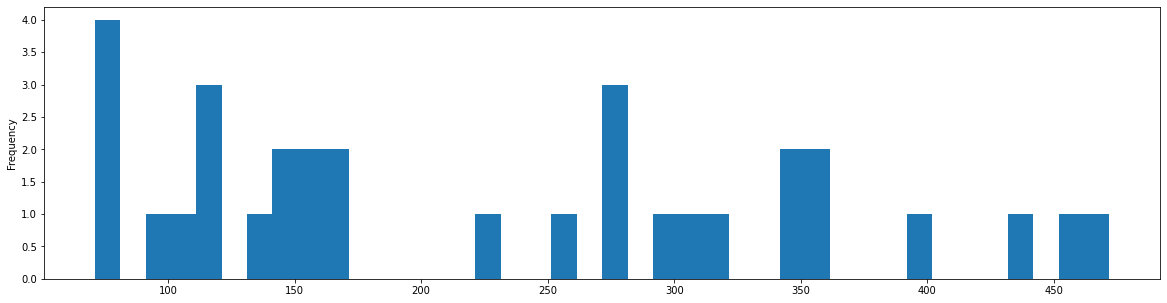

In [ ]:
cars['disp'].plot.hist(bins=40, figsize=(20,5))

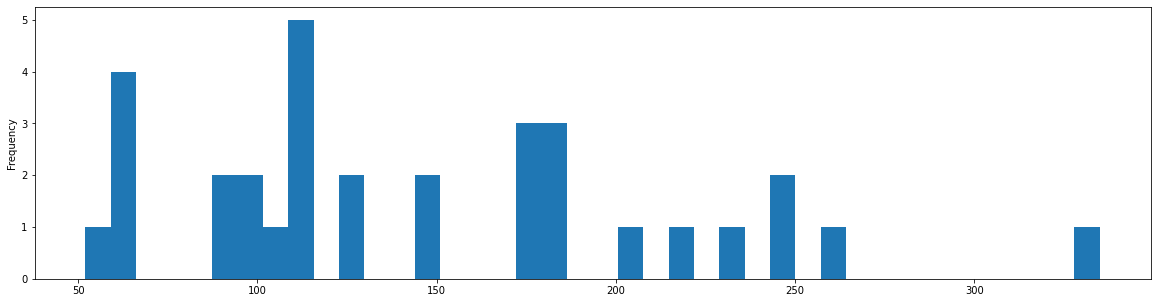

In [ ]:
cars['hp'].plot.hist(bins=40, figsize=(20,5))

In [ ]:
cars.isnull().sum()

cars_names    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
sec           0
an            0
gear          0
carb          0
dtype: int64

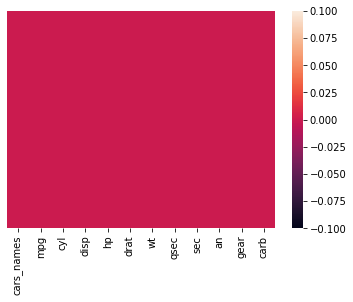

In [ ]:
sns.heatmap(cars.isnull(), yticklabels=False)

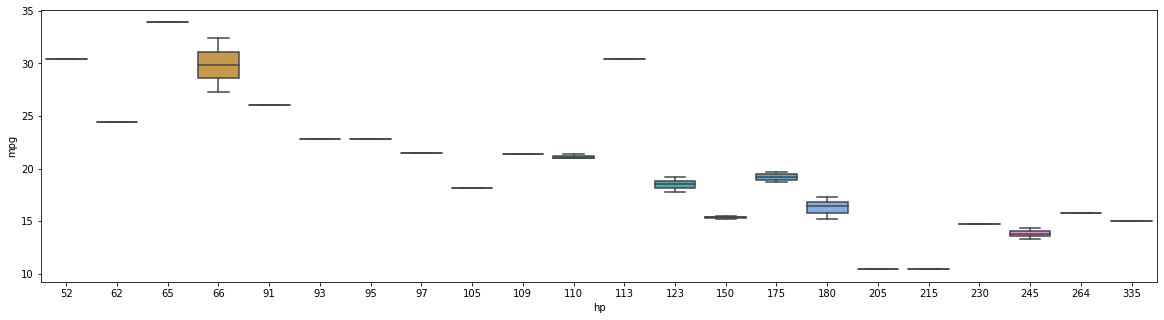

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='hp', y='mpg', data=cars)

In [ ]:
# Define Variables

X_prime = cars.iloc[:,[1,3,4,5]].values

y_cars = cars.iloc[:,9]

In [ ]:
#X_prime
#y_cars

In [ ]:
X = preprocessing.scale(X_prime)
y = y_cars

**Splitting data into test and trin datasets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

**Building and training your model with training data**

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


**Evualuating your model's predictions against the test dataset**

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.50      0.67         6

    accuracy                           0.73        11
   macro avg       0.81      0.75      0.72        11
weighted avg       0.83      0.73      0.71        11



In [ ]:
accuracy_score(y_test, y_pred)

0.7272727272727273

In [ ]:
# predict class using data and kNN classifier
Z = clf.predict(X_test)

**Plot the Results**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5, 0],
       [3, 3]])

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


In [ ]:
X1.ravel().shape

(298633,)

In [ ]:
X2.ravel().T.shape

(298633,)

In [ ]:
X1.shape

(523, 571)

In [ ]:
X2.shape

(523, 571)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


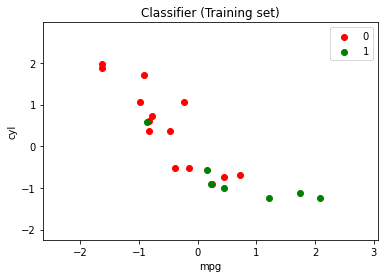

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()].T)).reshape(X1.shape),
#            alpha = 0.75, cmap = ListedColormap(('red', 'green')))



plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('mpg')
plt.ylabel('cyl')
plt.legend()
plt.show()